# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


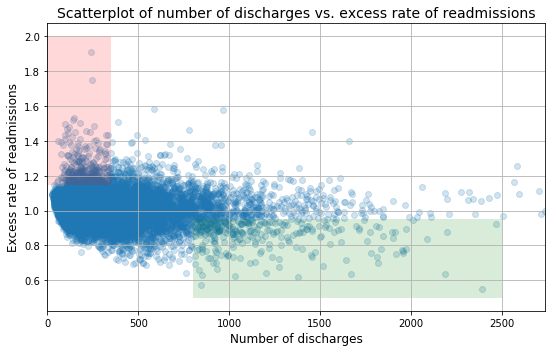

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Check the statement in B

In [5]:
small_discharge = clean_hospital_read_df['Excess Readmission Ratio'].loc[clean_hospital_read_df['Number of Discharges']<100]
print('cases with number of discharges < 100:', small_discharge.count())
print('cases with number of discharges < 100 and excess readmission ratio > 1:', sum(small_discharge>1))
print('percentage of excess readmission ratio > 1:', sum(small_discharge>1)/small_discharge.count())
print('average excess readmission ratio when number of discharges < 100 %.4f' %small_discharge.mean())

cases with number of discharges < 100: 1188
cases with number of discharges < 100 and excess readmission ratio > 1: 751
percentage of excess readmission ratio > 1: 0.6321548821548821
average excess readmission ratio when number of discharges < 100 1.0226


In [6]:
large_discharge = clean_hospital_read_df['Excess Readmission Ratio'].loc[clean_hospital_read_df['Number of Discharges']>1000]
print('cases with number of discharges > 1000:', large_discharge.count())
print('cases with number of discharges > 1000 and excess readmission ratio > 1:', sum(large_discharge>1))
print('percentage of excess readmission ratio > 1:', sum(large_discharge>1)/large_discharge.count())
print('average excess readmission ratio when number of discharges > 1000 %.4f' %large_discharge.mean())

cases with number of discharges > 1000: 463
cases with number of discharges > 1000 and excess readmission ratio > 1: 206
percentage of excess readmission ratio > 1: 0.4449244060475162
average excess readmission ratio when number of discharges > 1000 0.9783


The results are correct. However samples with number of discharges < 100 or > 1000 are only a small portion of the whole dataset. We should further evaluate the relation using all data points.

In [7]:
print("Total number of samples:", len(x))

Total number of samples: 11494


#### Next we check the pearson correlation, it shows there is a negative correlation between excess readdmission ratio and number of discharges.

In [8]:
clean_hospital_read_df['Excess Readmission Ratio'].corr(clean_hospital_read_df['Number of Discharges'])

-0.09739794351079353

#### Statistical Test

To check if there is a statistic significance in the above observation, we can do a t-test on the linear regression coefficient.

The Null hyphothesis would be $H_0: \beta_1 = 0$

In [9]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:    ", slope)
print("intercept:", intercept)
print("r_value:  ", r_value)
print("p_value:  ", p_value)
print("std_err:  ", std_err)

slope:     -2.8565052943822637e-05
intercept: 1.017947557954422
r_value:   -0.09309554287590444
p_value:   1.502275642661476e-23
std_err:   2.8498248278499884e-06


We can see the p_value is pretty small, indicating we should reject the null hyphothesis that the slope is zero. We can plot the fitted line along with the scatter plot to see the negative correlation more clearly.

<Figure size 576x576 with 0 Axes>

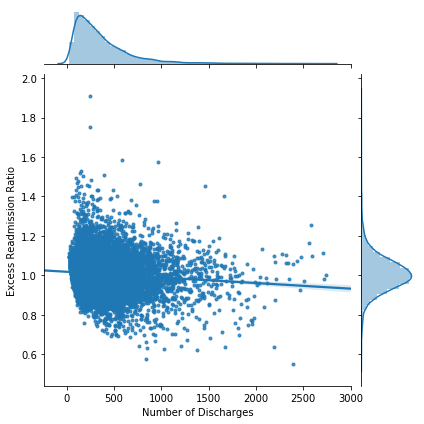

In [10]:
plt.figure(figsize=(8,8))
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', 
           data=clean_hospital_read_df.iloc[81:-3],
           kind='reg', marker='.')
plt.show()

Although there is a statistical significance, the slope ~= $2.86*10^{-5}$ is quite small. We can make a plot where we divide the number of discharge according to quantiles, and plot the mean excess readmission ratio within each quantile group. We can see the excess readmission ratio reduced by ~0.03 across the whole range of number of discharge, and that is ~3% relative change. Thus the practical significance is not strong. 

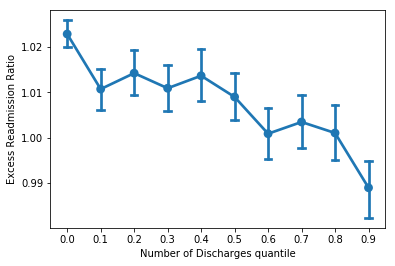

In [11]:
clean_hospital_read_df['Number of Discharges quantile'] = pd.qcut(clean_hospital_read_df['Number of Discharges'], 
                                                            labels=False, q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
clean_hospital_read_df['Number of Discharges quantile'] /= 10
sns.pointplot(x='Number of Discharges quantile', y='Excess Readmission Ratio', data=clean_hospital_read_df, capsize=.2)
plt.show()

Also, we can see that the variance of excess readmission ratio is large (also indicated by the $R^2$ in linear regression), which means the number of discharge alone is not enough to explain the variance in excess readmission ratio. Thus, while formulating our regulatory policy, we should consider case by case and investicate other variables. If we only consider the trend associated with number of discharge and then require all small hospitals to demonstrate upgraded resource allocation for quality care, we may end up hurt a lot of small hospitals that actually have low excess readmission ratio.